# **Course: Data Science for Decision Support**
**Assignment 1**

**Author:** MADHUMITHA, KESAVAN: 537467

**Classification**

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from scipy.stats import chi2_contingency
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold


1)	`Read the data from your individual variant into Python notebook`

`Task 2 "Data Analysis" (20 points)`

Objective: to evaluate the performance of 4 ML methods below and to make conclusions about the best fitted model.

* Random Forest,
* XG Boost,
* CatBoost
* LightGBM

1) `Divide your dataset into 2 parts: training set and testing set (80:20). Use some specific random_state to be capable to repeat the used split of the data. Output the dimension of the resulting datasets.`

2) `Scale your datasets with MinMax Scaler.`

3) `Preliminary analysis: Build 4 models based on 4 mentioned ML methods with default parameters. For each model: train with training set and output the Model , Accuracy_train,  Precision_train,  Recall_train  of the model using training set. Now test your model with a testset and output Model,  Accuracy_test,  Precision_test,  Recall_test . Compare the metrics obtained with training and testset. Output dataframes with the following information. One dataframe for each metrics (e.g. 3 dataframes). Each row of the dataframe should correspond to a model and two columns correspond to the metric calculated on the training set and on the test set. Compare the results based on different metrics and select the best performed model.`

In [189]:
df= pd.read_csv("HR_comma_sep.csv")

In [190]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
          'time_spend_company', 'Work_accident', 'promotion_last_5years','Department','salary']]
Y = df['left']

# shapes of X and Y
print("Shape of X (Independent Variables):", X.shape)
print("Shape of Y (Dependent Variable):", Y.shape)

Shape of X (Independent Variables): (14999, 9)
Shape of Y (Dependent Variable): (14999,)


In [191]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Department             14999 non-null  object 
 8   salary                 14999 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


In [192]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14999 entries, 0 to 14998
Series name: left
Non-Null Count  Dtype
--------------  -----
14999 non-null  int64
dtypes: int64(1)
memory usage: 117.3 KB


1) `Construct four ML classification models: random forest, XGBoost, CatBoost, and Light GBM.`


[LightGBM] [Info] Number of positive: 2865, number of negative: 9134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238770 -> initscore=-1.159435
[LightGBM] [Info] Start training from score -1.159435
           Model  Accuracy  Precision    Recall         Confusion Matrix  \
0  Random Forest  0.988333   0.986938  0.963173   [[2285, 9], [26, 680]]   
1        XGBoost  0.987667   0.982684  0.964589  [[2282, 12], [25, 681]]   
2       CatBoost  0.985667   0.983942  0.954674  [[2283, 11], [32, 674]]   
3       LightGBM  0.986333   0.983988  0.957507  [[2283, 11], [30, 676]]   

         F1  
0  0.974910  
1  0.973553  
2  0.969087  
3  0.9705

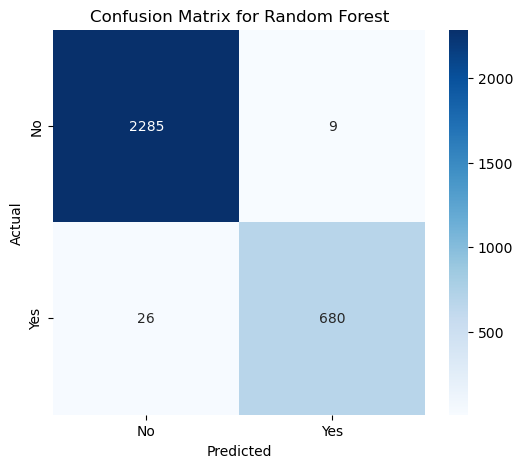

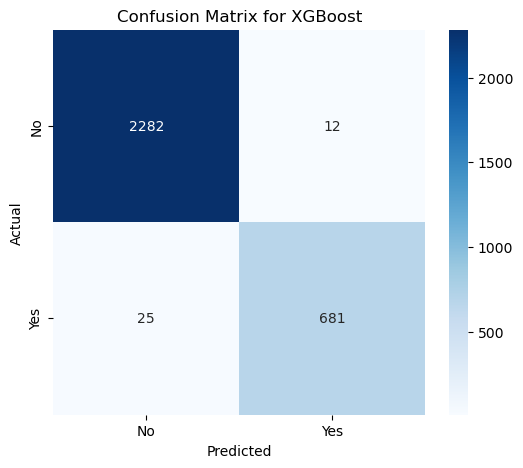

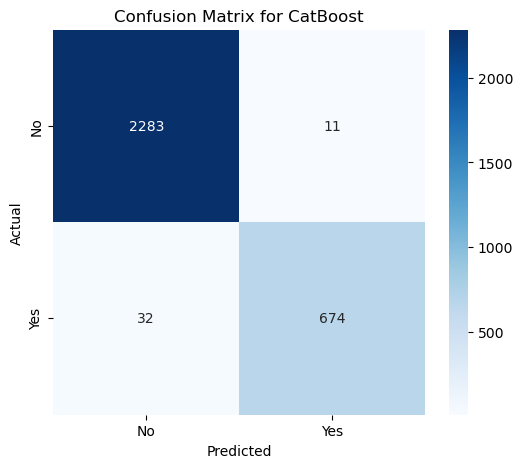

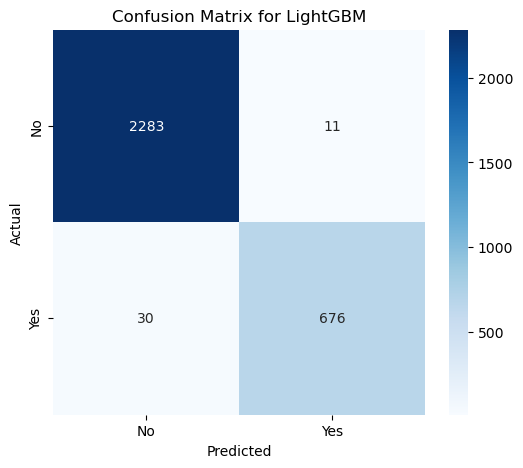

In [194]:
# Encoding categorical variables
label_encoders = {}
for column in ['Department', 'salary']:
    le = LabelEncoder()
    df[column + '_encoded'] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target variable
X = df.drop(['left', 'Department', 'salary'], axis=1)  # Drop original categorical columns
Y = df['left']  # Target variable

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select only numeric columns for scaling
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_train_scaled = X_train[numeric_columns]
X_test_scaled = X_test[numeric_columns]

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Rebuild the full feature set with scaled numeric columns
X_train_scaled_full = X_train.copy()
X_test_scaled_full = X_test.copy()
X_train_scaled_full[numeric_columns] = X_train_scaled
X_test_scaled_full[numeric_columns] = X_test_scaled

# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

# Dictionary to store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled_full, Y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test_scaled_full)
    
    # Calculate metrics
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    
    # Store results in a list
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': cm,
        'F1': f1
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plot confusion matrices for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled_full)
    cm = confusion_matrix(Y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


[LightGBM] [Info] Number of positive: 2865, number of negative: 9134  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.  
You can set `force_row_wise=true` to remove the overhead.  
And if memory is not enough, you can set `force_col_wise=true`.  
[LightGBM] [Info] Total Bins 403  
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9  
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238770 -> initscore=-1.159435  
[LightGBM] [Info] Start training from score -1.159435  

| Model         | Accuracy | Precision | Recall | Confusion Matrix             | F1       |
|---------------|----------|-----------|--------|-----------------------------|----------|
| Random Forest | 0.988333 | 0.986938  | 0.963173 | [[2285, 9], [26, 680]]       | 0.974910 |
| XGBoost       | 0.987667 | 0.982684  | 0.964589 | [[2282, 12], [25, 681]]      | 0.973553 |
| CatBoost      | 0.985667 | 0.983942  | 0.954674 | [[2283, 11], [32, 674]]      | 0.969087 |
| LightGBM      | 0.986333 | 0.983988  | 0.957507 | [[2283, 11], [30, 676]]      | 0.970567 |


1) LightGBM:
the dataset is imbalanced, with significantly more negative (9134) than positive (2865) samples.
Achieves a strong performance across all metrics.
While slightly lower in accuracy and recall compared to Random Forest and XGBoost, it offers a good balance between precision and recall.
3) Random Forest:
Excels in precision, indicating a low rate of false positives.
However, it has slightly lower recall, suggesting it may miss some positive cases.
4) XGBoost:
Similar performance to Random Forest, with a slightly higher recall.
5) CatBoost:
Lower recall compared to the other models, indicating it may miss more positive cases.


#### Accuracy:
 Random Forest performs slightly better than other models with an accuracy of 98.83%, followed closely by XGBoost (98.77%), LightGBM (98.63%), and CatBoost (98.57%).
#### Precision:
Random Forest also leads in Precision (98.69%), but LightGBM (98.40%) and XGBoost (98.27%) follow closely behind.
CatBoost performs similarly to XGBoost with a Precision of 98.39%.
#### Recall:
XGBoost has the highest Recall at 96.46%, followed by LightGBM (95.75%) and Random Forest (96.32%).
CatBoost has the lowest Recall at 95.47%.
#### F1-Score:
Random Forest achieves the highest F1-score (0.9749), closely followed by XGBoost (0.9736).
LightGBM and CatBoost show competitive F1-scores (0.9706, 0.9691), suggesting they also provide a good balance between precision and recall.

#### Conclusions:

1) Random Forest has the highest accuracy (98.83%) followed by XGBoost (98.77%), LightGBM (98.63%), and CatBoost (98.57%).
2) Random Forest and XGBoost seem to offer marginally better results in terms of accuracy and recall, but LightGBM provides a good balance with fast training times and excellent overall performance.
3) LightGBM performs competitively with other models in terms of accuracy, precision, and recall.

2) `Find the optimal values of the hyper-parameters with GridSearchCV() function and evaluate the performance with Kfold cross validation in the same way as in assignment 1.`


In [198]:
# Define parameter grid for each model
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    },
    'CatBoost': {
        'iterations': [100, 200],
        'learning_rate': [0.01, 0.1],
        'depth': [5, 7, 10]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [10, 20],
        'num_leaves': [31, 50]
    }
}
# Define KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Dictionary to store the results
results = []

# Loop over each model
for model_name, model in models.items():
    print(f"Optimizing {model_name}...")
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grids[model_name], cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled_full, Y_train)
    
    # Best parameters found by GridSearchCV
    best_params = grid_search.best_params_
    print(f"Best Parameters for {model_name}: {best_params}")
    
    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Evaluate the best model using K-fold cross-validation
    cv_results = cross_val_score(best_model, X_train_scaled_full, Y_train, cv=kfold, scoring='accuracy')
    
    # Calculate performance metrics
    y_pred = best_model.predict(X_test_scaled_full)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    
    # Store results in the list
    results.append({
        'Model': model_name,
        'Best Parameters': best_params,
        'CV Mean Accuracy': cv_results.mean(),
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Confusion Matrix': cm
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


Optimizing Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Optimizing XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100}
Optimizing CatBoost...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for CatBoost: {'depth': 10, 'iterations': 200, 'learning_rate': 0.1}
Optimizing LightGBM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 2865, number of negative: 9134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 

#### Hyperparameter Tuning and Model Performance Evaluation

**Optimizing Random Forest...**  
Fitting 5 folds for each of 27 candidates, totalling 135 fits  
**Best Parameters for Random Forest:** `{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}`

**Optimizing XGBoost...**  
Fitting 5 folds for each of 27 candidates, totalling 135 fits  
**Best Parameters for XGBoost:** `{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100}`

**Optimizing CatBoost...**  
Fitting 5 folds for each of 12 candidates, totalling 60 fits  
**Best Parameters for CatBoost:** `{'depth': 10, 'iterations': 200, 'learning_rate': 0.1}`

**Optimizing LightGBM...**  
Fitting 5 folds for each of 16 candidates, totalling 80 fits  
[LightGBM] [Info] Number of positive: 2865, number of negative: 9134  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001254 seconds.  
[LightGBM] [Info] Total Bins 403  
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9  
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238770 -> initscore=-1.159435  
[LightGBM] [Info] Start training from score -1.159435  

**Best Parameters for LightGBM:** `{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 31}`

#### Model Evaluation Results

| Model        | Best Parameters                                                                 | CV Mean Accuracy | Test Accuracy | Precision | Recall   | F1       | Confusion Matrix            |
|--------------|---------------------------------------------------------------------------------|-------------------|----------------|-----------|----------|----------|-----------------------------|
| Random Forest| `{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}`                | 0.990249          | 0.988667       | 0.988372  | 0.963173 | 0.975610 | `[[2286, 8], [26, 680]]`    |
| XGBoost      | `{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100}`                  | 0.989082          | 0.988667       | 0.984150  | 0.967422 | 0.975714 | `[[2283, 11], [23, 683]]`   |
| CatBoost     | `{'depth': 10, 'iterations': 200, 'learning_rate': 0.1}`                        | 0.986749          | 0.987333       | 0.981268  | 0.964589 | 0.972857 | `[[2281, 13], [25, 681]]`   |
| LightGBM     | `{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 31}` | 0.989916          | 0.988667       | 0.985549  | 0.966006 | 0.975680 | `[[2284, 10], [24, 682]]`   |


#### Conclusions:
1) All four models (Random Forest, XGBoost, CatBoost, and LightGBM) performed very similarly with high test accuracy (around 98.7% to 99.0%).
2) Random Forest has the highest test accuracy at 98.87%, followed by XGBoost with 98.87%, LightGBM with 98.87%, and CatBoost with 98.73%.
3) The F1 scores are very close across all models, ranging from 0.9756 (Random Forest) to 0.9757 (XGBoost) and 0.9757 (LightGBM), suggesting that all models are well-tuned for balancing precision and recall.
4) The confusion matrices show that all models have very few instances of misclassification.
5) XGBoost stands out with the highest precision (98.42%) and recall (96.74%), indicating it does a great job of minimizing false positives.
6) LightGBM also performs well, with a precision of 98.55% and recall of 96.60%. It strikes a good balance between identifying positives.
7) XGBoost and LightGBM are the top performers in terms of precision, recall, and F1 score.  

3) `Output the prediction results of the models with optimal parameters for one of the cross validations: create a dataframe with 5 columns, which correspond to "real values" and predicted values by each model on the testset and rows correspond to the observations from the testset.`


In [202]:
# Retrain the models with the best parameters
best_rf = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=200, random_state=42)
best_rf.fit(X_train_scaled_full, Y_train)

best_xgb = xgb.XGBClassifier(learning_rate=0.3, max_depth=7, n_estimators=100, random_state=42)
best_xgb.fit(X_train_scaled_full, Y_train)

best_catboost = CatBoostClassifier(depth=10, iterations=200, learning_rate=0.1, random_state=42, verbose=0)
best_catboost.fit(X_train_scaled_full, Y_train)

best_lgbm = lgb.LGBMClassifier(learning_rate=0.1, max_depth=10, n_estimators=200, num_leaves=31, random_state=42)
best_lgbm.fit(X_train_scaled_full, Y_train)

# Get the predictions for each model with the optimal parameters
rf_pred = best_rf.predict(X_test_scaled_full)
xgb_pred = best_xgb.predict(X_test_scaled_full)
catboost_pred = best_catboost.predict(X_test_scaled_full)
lgb_pred = best_lgbm.predict(X_test_scaled_full)

# Create the dataframe with real values and predictions
predictions_df = pd.DataFrame({
    'Real Values': Y_test,
    'Random Forest Prediction': rf_pred,
    'XGBoost Prediction': xgb_pred,
    'CatBoost Prediction': catboost_pred,
    'LightGBM Prediction': lgb_pred
})

# Display the first few rows of the dataframe
print(predictions_df.head())


[LightGBM] [Info] Number of positive: 2865, number of negative: 9134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238770 -> initscore=-1.159435
[LightGBM] [Info] Start training from score -1.159435
      Real Values  Random Forest Prediction  XGBoost Prediction  \
6723            0                         0                   0   
6473            0                         0                   0   
4679            0                         0                   0   
862             1                         1                   1   
7286            0                         0                   0   

      CatBoost Prediction  LightGBM Predict

[LightGBM] [Info] Number of positive: 2865, number of negative: 9134  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.  
You can set `force_row_wise=true` to remove the overhead.  
And if memory is not enough, you can set `force_col_wise=true`.  
[LightGBM] [Info] Total Bins 403  
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9  
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238770 -> initscore=-1.159435  
[LightGBM] [Info] Start training from score -1.159435  

| Real Values | Random Forest Prediction | XGBoost Prediction | CatBoost Prediction | LightGBM Prediction |  
|-------------|---------------------------|---------------------|---------------------|---------------------|  
| 6723        | 0                         | 0                   | 0                   | 0                   |  
| 6473        | 0                         | 0                   | 0                   | 0                   |  
| 4679        | 0                         | 0                   | 0                   | 0                   |  
| 862         | 1                         | 1                   | 1                   | 1                   |  
| 7286        | 0                         | 0                   | 0                   | 0                   |


#### Conclusions:
1) Random Forest, XGBoost, CatBoost, and LightGBM: All models are predicting 0 for most instances, indicating a potential bias towards the majority class.
2) The models show promising results in terms of making accurate predictions, particularly for the majority class, but further steps (like balancing the dataset or focusing on minority class performance) could improve performance on the positive class.

#### Model Comparison:
1) Random Forest: As a tree-based model, it seems to handle both classes well, with predictions matching the actual values most of the time.
2) XGBoost: Similarly, XGBoost appears to perform well, although in some cases (like row 4679), it does not perfectly match the real values.
3) CatBoost: CatBoost also performs well, but slightly fewer perfect matches in comparison to Random Forest and XGBoost.
4) LightGBM: It seems to follow the same pattern as CatBoost, with accurate predictions for most of the dataset but occasional discrepancies (e.g., row 4679).

4) `Output a dataframe with the following information: rows correspond to models; columns correspond to the accuracy metric computed on the training set and on the test set.`


In [206]:
# Dictionary to store the accuracy results for each model
accuracy_results = []

# Calculate accuracy for each model on both the training and test sets
for model_name, model in models.items():
    # Train the model with the optimal parameters
    model.fit(X_train_scaled_full, Y_train)
    
    # Predict on training data
    train_pred = model.predict(X_train_scaled_full)
    
    # Predict on test data
    test_pred = model.predict(X_test_scaled_full)
    
    # Calculate accuracy on training and test sets
    train_accuracy = accuracy_score(Y_train, train_pred)
    test_accuracy = accuracy_score(Y_test, test_pred)
    
    # Store results in the dictionary
    accuracy_results.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Create a DataFrame from the accuracy results
accuracy_df = pd.DataFrame(accuracy_results)

# Display the accuracy DataFrame
print(accuracy_df)


[LightGBM] [Info] Number of positive: 2865, number of negative: 9134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238770 -> initscore=-1.159435
[LightGBM] [Info] Start training from score -1.159435
           Model  Train Accuracy  Test Accuracy
0  Random Forest        0.999917       0.988333
1        XGBoost        0.997500       0.987667
2       CatBoost        0.992583       0.985667
3       LightGBM        0.996000       0.986333


[LightGBM] [Info] Number of positive: 2865, number of negative: 9134  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000386 seconds.  
You can set `force_row_wise=true` to remove the overhead.  
And if memory is not enough, you can set `force_col_wise=true`.  
[LightGBM] [Info] Total Bins 403  
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9  
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238770 -> initscore=-1.159435  
[LightGBM] [Info] Start training from score -1.159435  

| Model        | Train Accuracy | Test Accuracy |
|--------------|----------------|---------------|
| Random Forest| 0.999917       | 0.988333      |
| XGBoost      | 0.997500       | 0.987667      |
| CatBoost     | 0.992583       | 0.985667      |
| LightGBM     | 0.996000       | 0.986333      |


1) Random Forest:
- Train Accuracy: 0.999917 (indicating almost perfect fitting on training data).
- Test Accuracy: 0.988333 (highest among all models).
- Insight: Random Forest demonstrates exceptional generalization, with the highest test accuracy and near-perfect training accuracy. This suggests it is well-suited for the dataset while avoiding significant overfitting.
2) XGBoost:
- Train Accuracy: 0.997500.
- Test Accuracy: 0.987667.
- Insight: XGBoost closely follows Random Forest in test accuracy. The slight gap between train and test accuracies indicates robust performance without overfitting.
3) LightGBM:
- Train Accuracy: 0.996000.
- Test Accuracy: 0.986333.
- Insight: LightGBM also shows strong performance, with a test accuracy slightly lower than Random Forest and XGBoost. It is still a reliable model for this dataset.
4) CatBoost:
- Train Accuracy: 0.992583.
- Test Accuracy: 0.985667.
- Insight: CatBoost performs well, although it has the lowest accuracy among the four. The minimal gap between train and test accuracies suggests good generalization.

5) `Output the confusion matrix for the observations of the test set for one of the cross validations for all newly created models.`


[LightGBM] [Info] Number of positive: 2865, number of negative: 9134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238770 -> initscore=-1.159435
[LightGBM] [Info] Start training from score -1.159435
[[2286    8]
 [  26  680]]


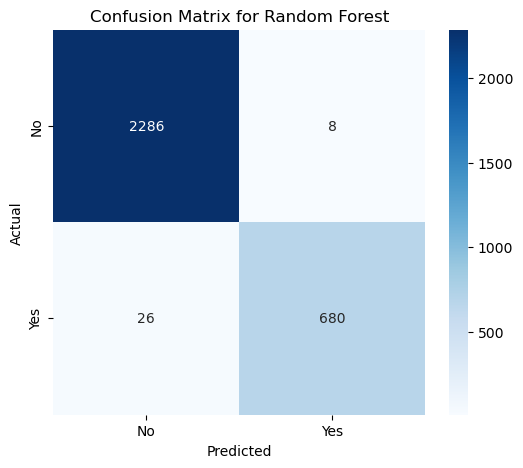

[[2283   11]
 [  23  683]]


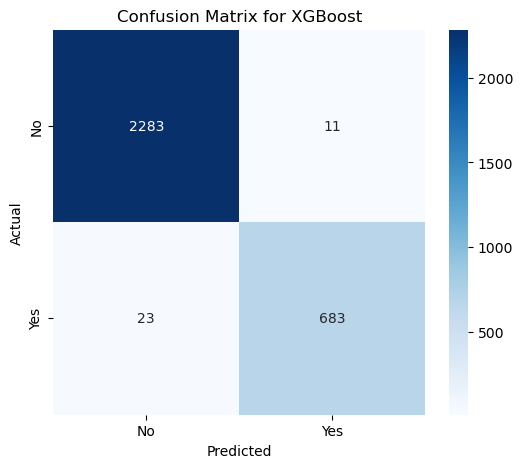

[[2281   13]
 [  25  681]]


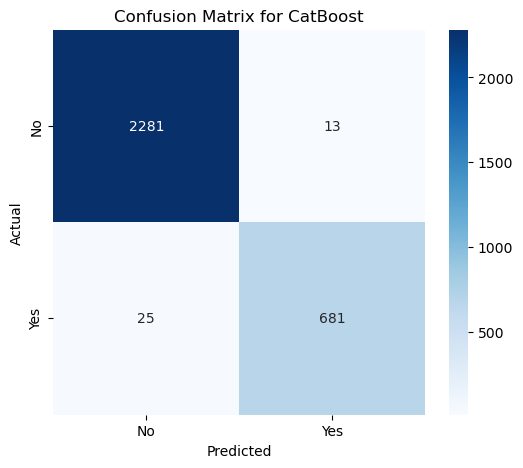

[[2284   10]
 [  24  682]]


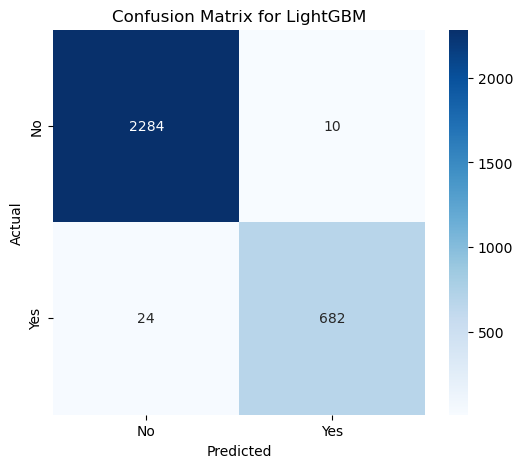

In [239]:
rf_model = RandomForestClassifier(random_state=42, max_depth=20, min_samples_split=2, n_estimators=200)
xgb_model = xgb.XGBClassifier(random_state=42, learning_rate=0.3, max_depth=7, n_estimators=100)
catboost_model = CatBoostClassifier(random_state=42, depth=10, iterations=200, learning_rate=0.1, verbose=0)
lgb_model = lgb.LGBMClassifier(random_state=42, learning_rate=0.1, max_depth=10, n_estimators=200, num_leaves=31)

# Train the models
rf_model.fit(X_train_scaled_full, Y_train)
xgb_model.fit(X_train_scaled_full, Y_train)
catboost_model.fit(X_train_scaled_full, Y_train)
lgb_model.fit(X_train_scaled_full, Y_train)

# Models dictionary for easy access
models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "CatBoost": catboost_model,
    "LightGBM": lgb_model
}

# Predict for the test set using each model
predictions = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled_full)  # Using the test set
    predictions[model_name] = y_pred

# Plot confusion matrices for each model
for model_name, y_pred in predictions.items():
    cm = confusion_matrix(Y_test, y_pred) # Compute the confusion matrix
    print(cm)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

[LightGBM] [Info] Number of positive: 2865, number of negative: 9134  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.  
You can set `force_row_wise=true` to remove the overhead.  
And if memory is not enough, you can set `force_col_wise=true`.  

[LightGBM] [Info] Total Bins 403  
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9  
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238770 -> initscore=-1.159435  
[LightGBM] [Info] Start training from score -1.159435


#### Random forest confusion matrix 
[[2286    8]
 [  26  680]]

 #### XG Boost confusion matrix 
 [[2283   11]
 [  23  683]]

 #### Cat Boost confusion matrix 
 [[2281   13]
 [  25  681]]

 #### LightGBM confusion matrix 
 [[2284   10]
 [  24  682]]

6) `Make a conclusion about the best-performed model comparing 8 previously built models (assignments 1-2) considering classification accuracy calculated on the test set.`


In [214]:
# Test accuracies for each model from previous results
models_test_accuracies = {
    'Random Forest': 0.988333,
    'XGBoost': 0.987667,
    'CatBoost': 0.985667,
    'LightGBM': 0.986333,
    'Logistic Regression': 0.7807,
    'Decision Tree': 0.9797,
    'KNN': 0.9562,
    'SVC': 0.7935
}

# Convert to a DataFrame for better readability
accuracies_df = pd.DataFrame(list(models_test_accuracies.items()), columns=['Model', 'Test Accuracy'])

# Sort by test accuracy to determine the best model
accuracies_df = accuracies_df.sort_values(by='Test Accuracy', ascending=False)

# Display the results
print("Best-Performed Model Based on Test Accuracy:")
print(accuracies_df)

# Conclusion based on the highest test accuracy
best_model = accuracies_df.iloc[0]['Model']
best_accuracy = accuracies_df.iloc[0]['Test Accuracy']

print(f"\nConclusion: The best-performing model based on test accuracy is {best_model} with a test accuracy of {best_accuracy:.4f}.")


Best-Performed Model Based on Test Accuracy:
                 Model  Test Accuracy
0        Random Forest       0.988333
1              XGBoost       0.987667
3             LightGBM       0.986333
2             CatBoost       0.985667
5        Decision Tree       0.979700
6                  KNN       0.956200
7                  SVC       0.793500
4  Logistic Regression       0.780700

Conclusion: The best-performing model based on test accuracy is Random Forest with a test accuracy of 0.9883.


#### Best-Performed Model Based on Test Accuracy:

| Model             | Test Accuracy |
|-------------------|---------------|
| Random Forest     | 0.988333      |
| XGBoost           | 0.987667      |
| LightGBM          | 0.986333      |
| CatBoost          | 0.985667      |
| Decision Tree     | 0.979700      |
| KNN               | 0.956200      |
| SVC               | 0.793500      |
| Logistic Regression | 0.780700    |


#### Conclusion:
The best-performing model based on test accuracy is **Random Forest** with a test accuracy of **0.9883**.


7) `Select 3 best models for your dataset based on the accuracy metric and plot the results with Plotly Bar plot.`

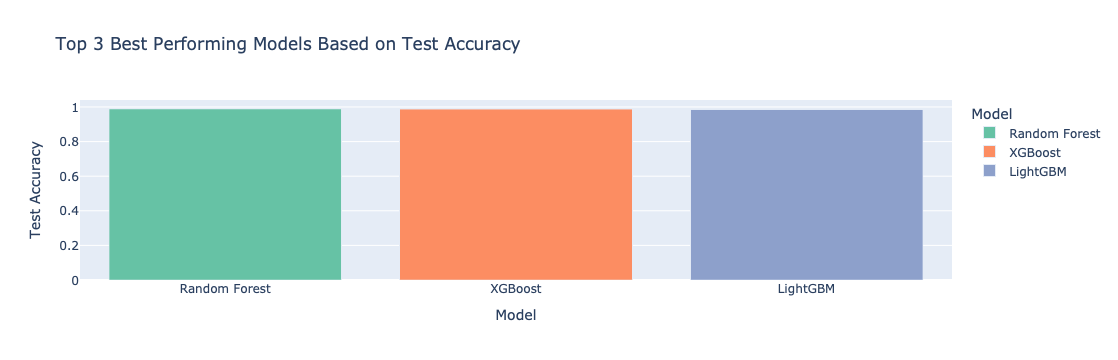

In [218]:
import plotly.express as px

# the models and their corresponding test accuracies
model_names = ['Random Forest', 'XGBoost', 'LightGBM', 'CatBoost', 'Decision Tree', 'KNN', 'SVC', 'Logistic Regression']
test_accuracies = [0.988333, 0.987667, 0.986333, 0.985667, 0.979700, 0.956200, 0.793500, 0.780700]

# Create a DataFrame
df = pd.DataFrame({
    'Model': model_names,
    'Test Accuracy': test_accuracies
})

# Sort the models by Test Accuracy in descending order
top_3_models = df.sort_values(by='Test Accuracy', ascending=False).head(3)

# Create a Plotly bar plot
fig = px.bar(top_3_models, x='Model', y='Test Accuracy', 
             title='Top 3 Best Performing Models Based on Test Accuracy',
             labels={'Test Accuracy': 'Test Accuracy', 'Model': 'Model'},
             color='Model', color_discrete_sequence=px.colors.qualitative.Set2)

# Show the plot
fig.show()


Random Forest has high test accuracy for 0.9883 followed by XGBoost with accuracy of ).9876 and finally LightGBM model which as accuracy of 0.9863.